In [2]:
% pylab inline
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylab as pb
from matplotlib import cm
from scipy.stats import norm
from scipy.special import gamma
from scipy.stats import chi
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal

Populating the interactive namespace from numpy and matplotlib


## Rejection Sampling

### Rejection sampling over a gaussian with unknown mean

In [7]:
mu0 = 0.0
var0 = 5.0
mean_real = 0.8
var_real = 0.2
N = 20
M = 1000
X = np.random.normal(mean_real, np.sqrt(var_real), N)
#print X

def parzenmio(X, X_ev, h, N):
    P_X = np.copy(X)
    msum = np.zeros(N)
    for j in range(0,X.shape[0]):
        msum += norm.pdf(X_ev, X[j], np.sqrt(h))
    P_X = msum/N
    return P_X

def parzendiego(x, samples, h2, N):
    N = np.size(samples)
    ret = np.zeros(np.size(x))
    for i in xrange(N):
        ret += multivariate_normal.pdf(x, samples[i], h2)
    return ret / N

def likelihood_gaussian(X_ev, mu, sigma):
    ret = np.copy(mu)
    for i in range(0,mu.shape[0]):
        tmp = norm.pdf(X_ev, mu[i], np.sqrt(sigma))
        #print tmp.shape
        ret[i] = np.asscalar(np.prod(tmp))
    return ret

def compute_k(X_ev):
    k = np.sum(X_ev)/X_ev.shape[0]
    ml_mean = np.zeros(1)
    ml_mean[0] = np.asscalar(k)
    ret = likelihood_gaussian(X_ev, ml_mean, var_real)
    return np.asscalar(ret)

def get_samples_reject(X, number):
    prop_samples = np.random.normal(mu0, np.sqrt(var0), number)
    k = compute_k(X)
    print k
    uniform_samples = np.random.uniform(size=number) * k * norm.pdf(prop_samples, mu0, np.sqrt(var0))
    cond = uniform_samples <= np.multiply(likelihood_gaussian(X, prop_samples, var_real),norm.pdf(prop_samples, mu0, np.sqrt(var0)))
    return prop_samples[cond]

Z = get_samples_reject(X, M)
print Z.shape

1.33714514054e-05
(38,)


In [13]:
X_eval = np.linspace(-2.0,2.0, 1000)
Y = norm.pdf(X_eval, mean_real, np.sqrt(var_real))

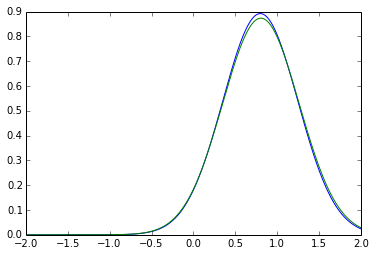

In [14]:
P_Z = parzendiego(X_eval, Z, 0.2, 1000)
pb.plot(X_eval, Y)
pb.plot(X_eval, P_Z)

### Rejection sampling with unknown mean and var(Homework)

## SIR Method

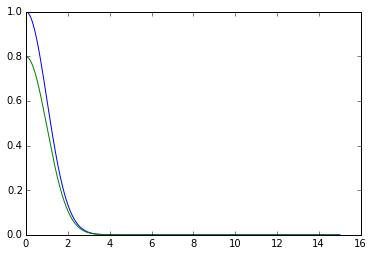

In [202]:
N = 1000
X_eval = np.linspace(0.0, 15.0, N)
var_1 = 0.5
Y_eval = np.exp((-1.0*np.power(X_eval, 2))/2.0)
Y_eval_norm = Y_eval*(2.0/np.sqrt(2.0*math.pi))
pb.plot(X_eval, Y_eval)
pb.plot(X_eval, Y_eval_norm)

In [216]:
def not_normalized_gaussian(X_eval):
    Y_eval = np.exp((-1.0*np.power(X_eval, 2))/2.0)
    #print Y_eval
    return Y_eval

def exponential_pdf(X_eval, la=1.0):
    Y_eval = la*np.exp(-la*X_eval)
    #print Y_eval
    return Y_eval

N = 100000
prop_samples = np.random.exponential(size=N)
mnum = np.divide(not_normalized_gaussian(prop_samples), exponential_pdf(prop_samples))
mdem = np.sum(mnum)
W_l = mnum * (1.0/mdem)
print np.sum(W_l)

[  9.40273944e-06   1.18033074e-05   1.28187335e-05   9.18583041e-06
   1.12099761e-05   1.31625347e-05   4.40994780e-06   1.31123097e-05
   1.18578945e-05   1.29059685e-05   1.25595973e-05   1.18219725e-05
   1.22678497e-05   3.59646494e-07   6.82183826e-06   1.28123523e-05
   1.12702085e-05   1.10452593e-05   9.97325552e-06   1.11251444e-05]
1.0


In [219]:
# Multinomial sampling
M = 10000
new_samples = np.zeros(M)
for i in range(0,M):
    idx = np.random.multinomial(1, W_l, 1)
    idx = np.array(idx, dtype=bool)
    idx = idx.flatten()
    new_samples[i] = np.asscalar(prop_samples[idx])


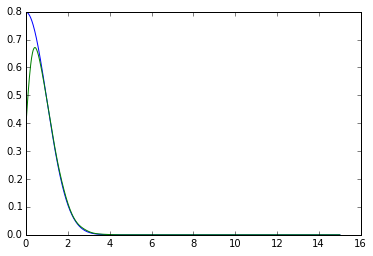

In [222]:
P_Z = parzendiego(X_eval, new_samples, 0.07, M)
pb.plot(X_eval, Y_eval_norm)
pb.plot(X_eval, P_Z)

## SIR Method for fitting a guassian model with unknown mean and given variance

In [231]:
mu0 = 0.0
var0 = 5.0
mean_real = 0.8
var_real = 0.2
N = 100
M = 1000
X = np.random.normal(mean_real, np.sqrt(var_real), N)

def likelihood_gaussian(X_ev, mu, sigma):
    ret = np.copy(mu)
    for i in range(0,mu.shape[0]):
        tmp = norm.pdf(X_ev, mu[i], np.sqrt(sigma))
        #print tmp.shape
        ret[i] = np.asscalar(np.prod(tmp))
    return ret

N = 20000
prop_samples = np.random.normal(mu0, np.sqrt(var0), N)
mnum = np.divide(likelihood_gaussian(X, prop_samples, var_real), norm.pdf(prop_samples, mu0, np.sqrt(var0)))
mdem = np.sum(mnum)
W_l = mnum * (1.0/mdem)
print np.sum(W_l)

1.0


In [232]:
# Multinomial sampling
M = 10000
new_samples = np.zeros(M)
for i in range(0,M):
    idx = np.random.multinomial(1, W_l, 1)
    idx = np.array(idx, dtype=bool)
    idx = idx.flatten()
    new_samples[i] = np.asscalar(prop_samples[idx])

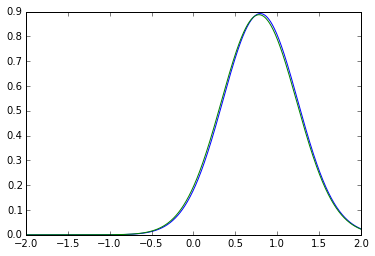

In [237]:
P_Z = parzendiego(X_eval, new_samples, 0.2, M)
X_eval = np.linspace(-2.0,2.0, 1000)
Y = norm.pdf(X_eval, mean_real, np.sqrt(var_real))
pb.plot(X_eval, Y)
pb.plot(X_eval, P_Z)

## SIR Method for fitting a Gaussian model with unknown variance and mean

In [ ]:
def parzenmio_multivariate(X, X_ev, h, N):
    P_X = np.copy(X)
    msum = np.zeros(N)
    for j in range(0,X.shape[0]):
        msum += multivariate_normal.pdf(X_ev[j,:], X[j,:], np.sqrt(h))
    P_X = msum/N
    return P_X

In [3]:
mu0 = 0.0
var0 = 5.0
mean_real = 0.8
var_real = 0.2

N = 100
M = 1000
X = np.random.normal(mean_real, np.sqrt(var_real), N)

def likelihood_gaussian(X_ev, mu, sigma):
    ret = np.copy(mu)
    for i in range(0,mu.shape[0]):
        tmp = norm.pdf(X_ev, mu[i], np.sqrt(1.0/sigma[i]))
        #print tmp.shape
        ret[i] = np.asscalar(np.prod(tmp))
    return ret

N = 20000
prop_samples_prec = np.random.gamma(2.0, 2.0, N)
prop_samples_mean = np.zeros(N)
for i in range(0,N):
    prop_samples_mean[i] = np.random.normal(mu0, np.sqrt(1.0/prop_samples_prec[i]))
    
mnum = likelihood_gaussian(X, prop_samples_mean, prop_samples_prec)
mdem = np.sum(mnum)
W_l = mnum * (1.0/mdem)
print (W_l > 1e-5).sum()
print np.sum(W_l)

576
1.0


In [4]:
# Multinomial sampling
M = 10000
new_samples_mean = np.zeros(M)
new_samples_prec = np.zeros(M)
for i in range(0,M):
    idx = np.random.multinomial(1, W_l, 1)
    idx = np.array(idx, dtype=bool)
    idx = idx.flatten()
    new_samples_mean[i] = np.asscalar(prop_samples_mean[idx])
    new_samples_prec[i] = np.asscalar(prop_samples_prec[idx])

AttributeError: 'module' object has no attribute 'stack'

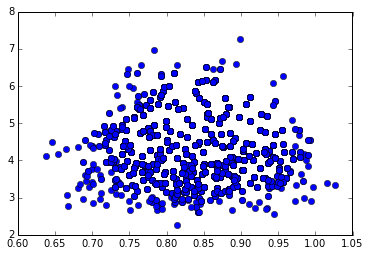

In [5]:
pb.plot(new_samples_mean, new_samples_prec, 'bo')
all_params = np.stack([new_samples_mean, new_samples_prec], axis=0)
all_new_params = np.stack([prop_samples_mean, prop_samples_prec], axis=0)
#all_params = np.matrix(all_params)

[[ 0.81167898  5.84643209]
 [ 0.78489953  3.93439194]
 [ 0.7649812   5.28941861]
 ..., 
 [ 0.84982878  6.22995542]
 [ 0.7635445   3.82204464]
 [ 0.78322694  4.82097936]]
[[  1.96834653e-01   8.08261585e+00]
 [ -3.57014107e-01   2.88604243e+00]
 [  2.92668030e-01   2.72880915e+00]
 ..., 
 [ -9.24399358e-01   4.53773999e-01]
 [  6.67147802e-01   3.71725679e+00]
 [ -4.19253137e-03   1.92385209e+00]]
